In [166]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np


In [167]:
## Dataset Information

'''The dataset used in this analysis is the [School Student Daily Attendance]
(https://www.kaggle.com/datasets/sahirmaharajj/school-student-daily-attendance) obtained from Kaggle. 

This dataset contains information about class performance with respect to enrollment, drop rate, leaves etc. 
'''

df= pd.read_csv('2018-2019_Daily_Attendance_20240429.csv')
df

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0
...,...,...,...,...,...,...
277148,79X695,20190620,230,46,136,48
277149,79X695,20190621,226,53,128,45
277150,79X695,20190624,226,42,130,54
277151,79X695,20190625,226,56,127,43


In [168]:
df.describe()

,Date,Enrolled,Absent,Present,Released
count,2.771530e+05,277153.00000,277153.000000,277153.000000,277153.000000
mean,2.018665e+07,596.98617,50.503538,544.499403,1.983229
std,4.555413e+03,482.90966,54.329671,452.970313,35.114511
min,2.018090e+07,1.00000,0.000000,1.000000,0.000000
25%,2.018111e+07,329.00000,23.000000,291.000000,0.000000
50%,2.019013e+07,476.00000,38.000000,430.000000,0.000000
75%,2.019041e+07,684.00000,59.000000,640.000000,0.000000
max,2.019063e+07,5955.00000,2151.000000,5847.000000,5904.000000


In [169]:
df.shape

(277153, 6)

In [170]:
# Since format of School DBN is alphanumeric therefore converting alphanumeric values in Numbers e.g. 01A01 will be converted as 01101 and 01B01 will be converted as 01201

# Define a mapping for each letter from 'A' to 'Z' to its numeric value
letter_mapping = {chr(ord('A') + i): str(i + 1) for i in range(26)}

# Create a translation table using the mapping
translation_table = str.maketrans(letter_mapping)

# Replace letters with their numeric values using the translation table
df['School DBN'] = df['School DBN'].str.translate(translation_table)

df1=df
df1

,School DBN,Date,Enrolled,Absent,Present,Released
0,0113015,20180905,172,19,153,0
1,0113015,20180906,171,17,154,0
2,0113015,20180907,172,14,158,0
3,0113015,20180912,173,7,166,0
4,0113015,20180913,173,9,164,0
...,...,...,...,...,...,...
277148,7924695,20190620,230,46,136,48
277149,7924695,20190621,226,53,128,45
277150,7924695,20190624,226,42,130,54
277151,7924695,20190625,226,56,127,43


In [171]:
# Check for duplicate rows

duplicate_rows_df1 = df1.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = sum(duplicate_rows_df1)

# Remove duplicate rows
df1 = df1[~duplicate_rows_df1]


In [172]:
df1

,School DBN,Date,Enrolled,Absent,Present,Released
0,0113015,20180905,172,19,153,0
1,0113015,20180906,171,17,154,0
2,0113015,20180907,172,14,158,0
3,0113015,20180912,173,7,166,0
4,0113015,20180913,173,9,164,0
...,...,...,...,...,...,...
277148,7924695,20190620,230,46,136,48
277149,7924695,20190621,226,53,128,45
277150,7924695,20190624,226,42,130,54
277151,7924695,20190625,226,56,127,43


In [173]:
# taking School Name and Date in X
# taking Enrolled Count, Absent Count, Present Count and Released Count in Y

x=df1[['School DBN','Date']]
y=df1[['Enrolled','Absent','Present','Released']]

In [174]:
x

,School DBN,Date
0,0113015,20180905
1,0113015,20180906
2,0113015,20180907
3,0113015,20180912
4,0113015,20180913
...,...,...
277148,7924695,20190620
277149,7924695,20190621
277150,7924695,20190624
277151,7924695,20190625


In [175]:
y

,Enrolled,Absent,Present,Released
0,172,19,153,0
1,171,17,154,0
2,172,14,158,0
3,173,7,166,0
4,173,9,164,0
...,...,...,...,...
277148,230,46,136,48
277149,226,53,128,45
277150,226,42,130,54
277151,226,56,127,43


In [178]:
#splitting the data into training data and test data ( aorund 20% of data will be used for testing the results whereas 80% for training the model)

#X_train contains training data
# y_train cotains result set for training data  ( both X_train and y_train will train the model)
# X_test contains the test data
# y_test contains test expected Results
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [179]:
#model=DecisionTreeClassifier()
model = MultiOutputRegressor(DecisionTreeRegressor())

In [180]:
#training the model
model.fit(X_train,y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor())

In [181]:
import numpy as np

# Predicting the values 
prediction=model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)  # Compute RMSE from MSE
r2 = r2_score(y_test, prediction)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)



Mean Absolute Error (MAE): 8.334557828651837
Mean Squared Error (MSE): 1450.5922113628758
Root Mean Squared Error (RMSE): 32.79447007095407
R-squared (R²) Score: 0.623499730010709


In [182]:
prediction

array([[2.510e+02, 2.800e+01, 2.230e+02, 0.000e+00],
       [2.090e+02, 1.400e+01, 1.950e+02, 0.000e+00],
       [5.460e+02, 4.100e+01, 5.050e+02, 0.000e+00],
       ...,
       [4.200e+02, 2.000e+01, 4.000e+02, 0.000e+00],
       [4.250e+02, 2.200e+01, 4.020e+02, 1.000e+00],
       [1.369e+03, 2.700e+01, 1.342e+03, 0.000e+00]])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

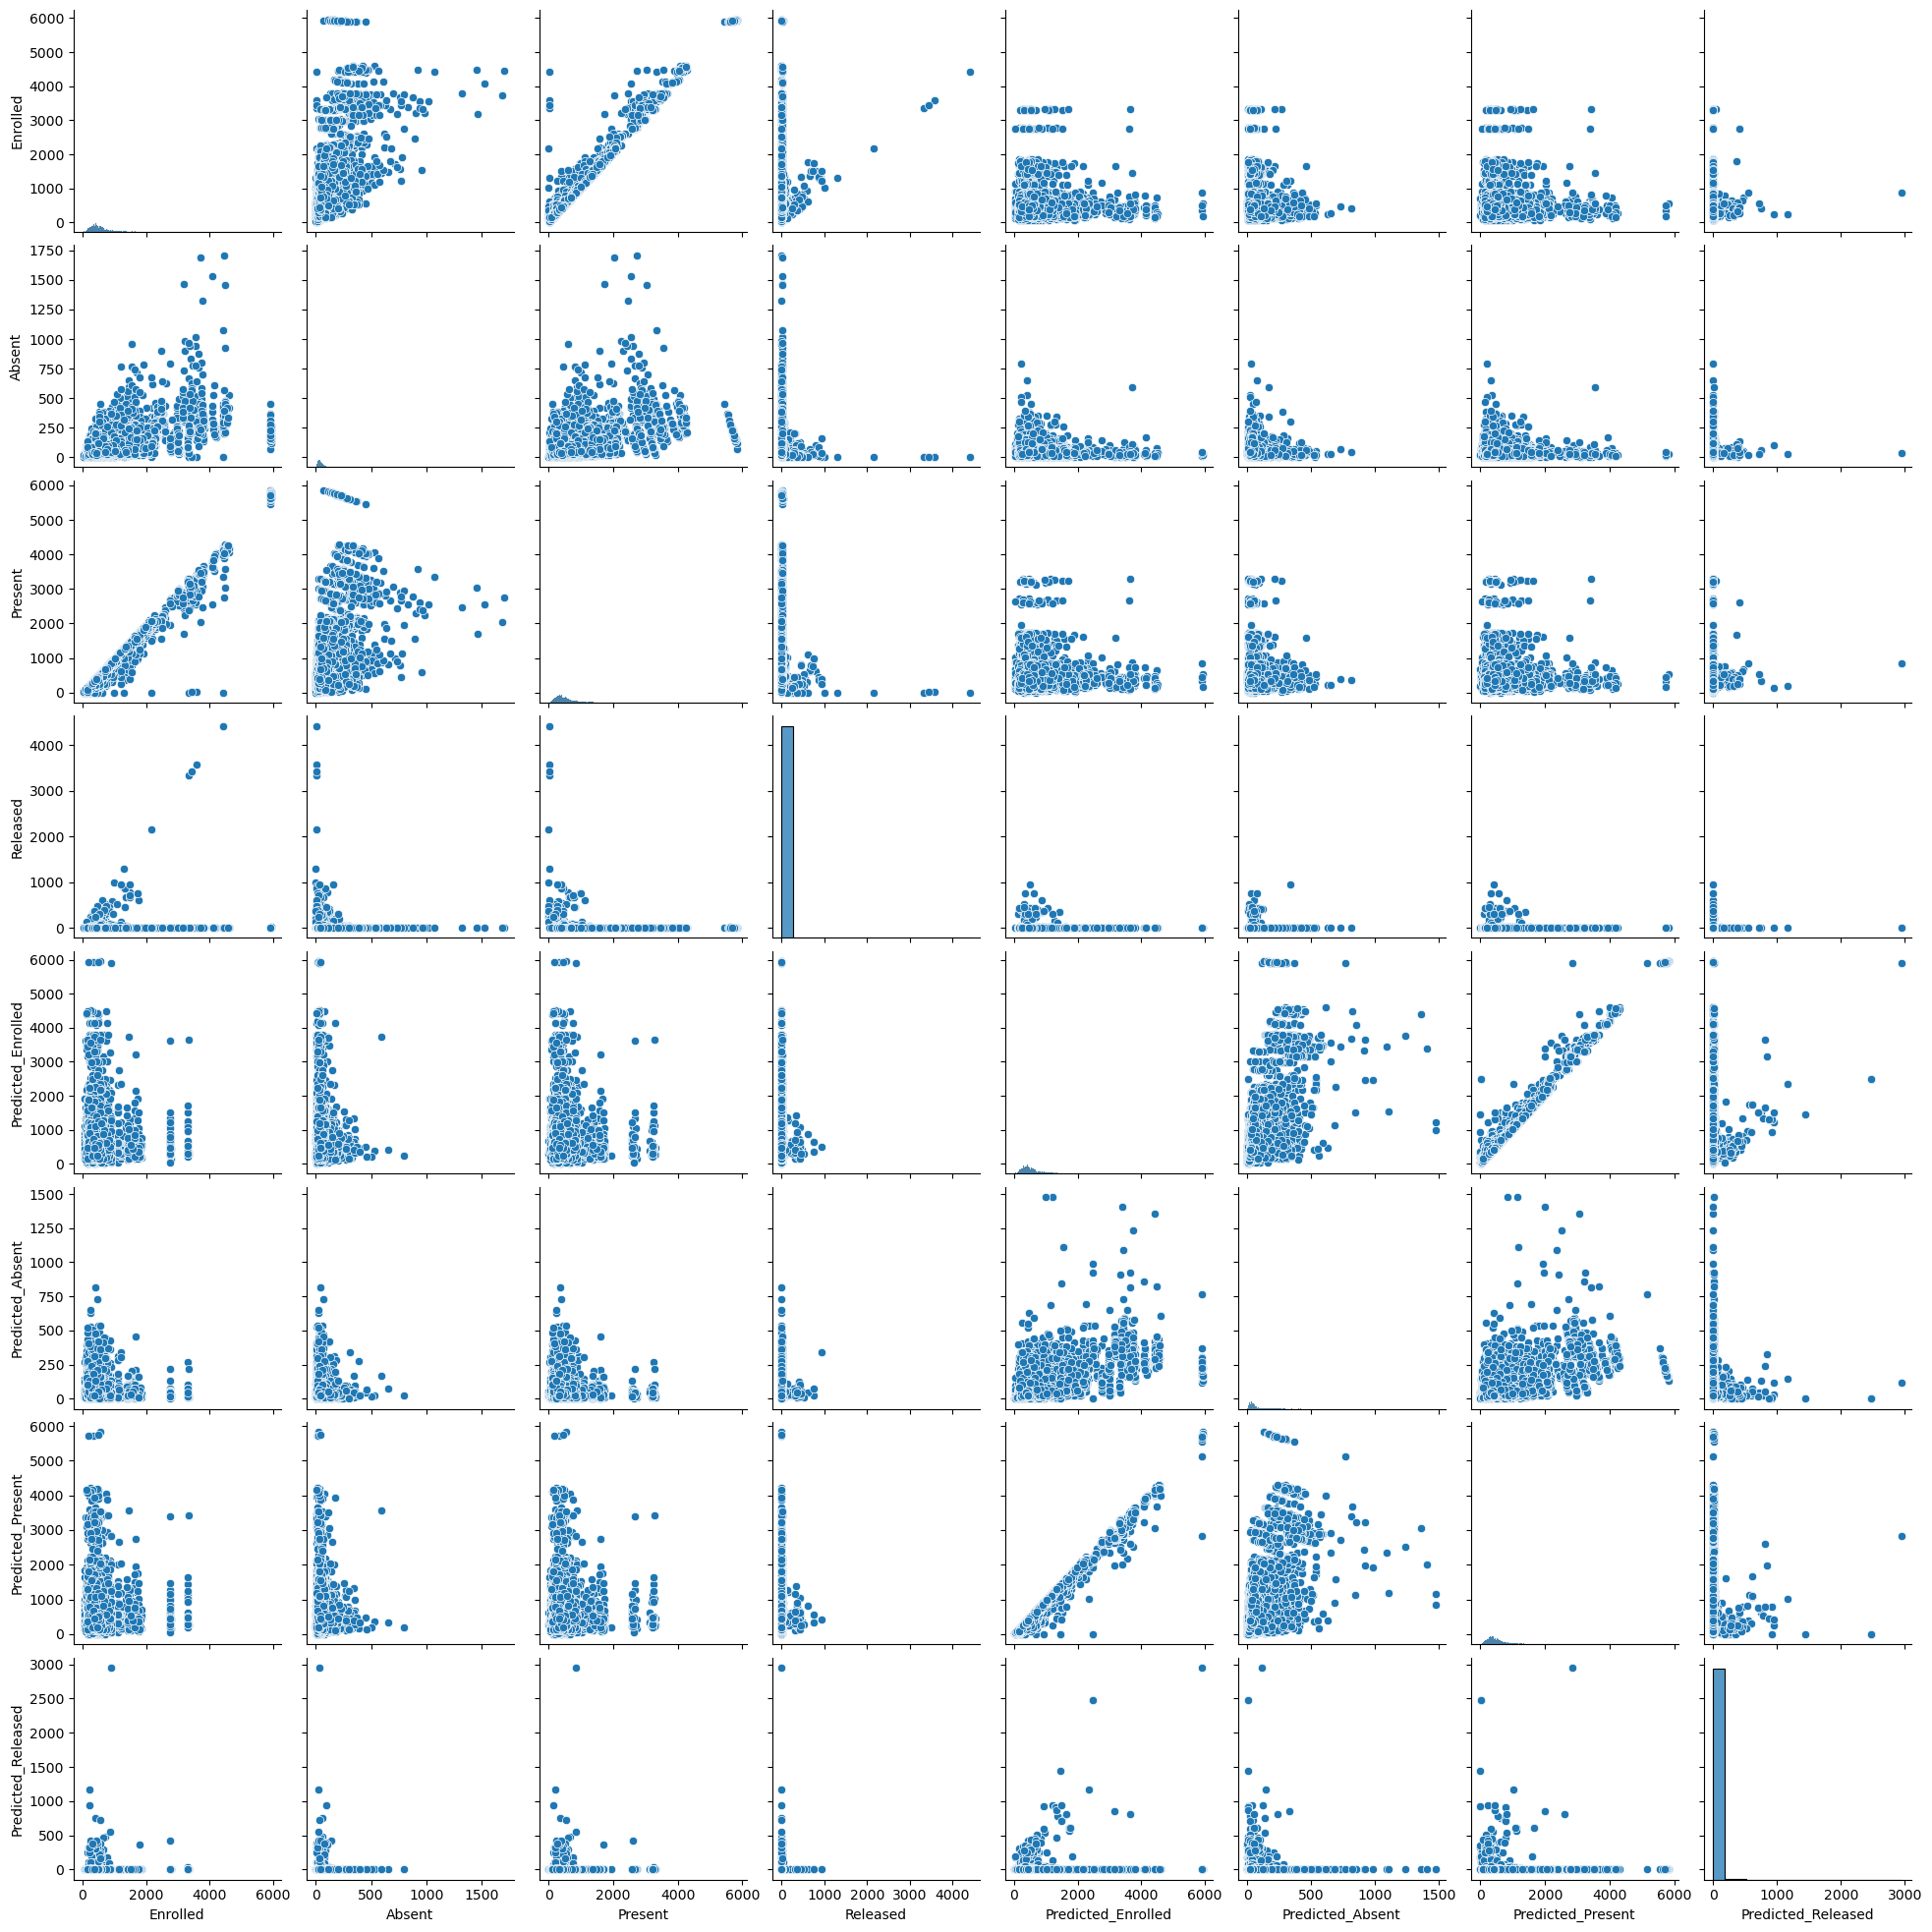

In [183]:
#plotting the Predicted values verses test data.

import seaborn as sns
import matplotlib.pyplot as plt

y_test_df = pd.DataFrame(y_test, columns=['Enrolled', 'Absent', 'Present', 'Released'])
prediction_df = pd.DataFrame(prediction, columns=['Predicted_Enrolled', 'Predicted_Absent', 'Predicted_Present', 'Predicted_Released'])

# Concatenate the DataFrames
combined_data = pd.concat([y_test_df, prediction_df], axis=1)

# Create a pairplot
sns.pairplot(combined_data)
# Show plot
plt.show()

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [184]:
import numpy as np
from datetime import datetime, timedelta

# Preparing a 2 dimentional array with a date range so that it could be supplied to our model to get prediction of future trends of attendance , leaves etc
#-----------------------------------------------------------------------------------------------------------
# Define a mapping for each letter from 'A' to 'Z' to its numeric value as School name contains alphanets which need to be converted into number
letter_mapping = {chr(ord('A') + i): str(i + 1) for i in range(26)}

# Create a translation table using the mapping
translation_table = str.maketrans(letter_mapping)

# Replace letters with their numeric values using the translation table, in this example I want to find trends of school having name '07X296'
mySchool=int('07X296'.translate(translation_table))
myArray=[]

# given below loop will create an array for date range starting from 01 Aug 2018 till 01 Jan 2020, this array will be supplied to model to get prediction for this period

start_date = datetime(2018, 8, 1)  # Start date
end_date = datetime(2020, 1, 1)    # End date (exclusive)
current_date=start_date
while current_date<end_date:
    date_string = current_date.strftime("%Y%m%d")
    internal_array=[mySchool,date_string]
    current_date += timedelta(days=1)
    myArray.append(internal_array)

X_pred = np.array(myArray)

# getting prediction from model
prediction2=model.predict(X_pred)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#-----------------------------------------------------------------------------------------------------------

In [185]:
# validaing the predcited results
prediction2

array([[231.,  43., 188.,   0.],
       [231.,  43., 188.,   0.],
       [231.,  43., 188.,   0.],
       ...,
       [239.,  21., 218.,   0.],
       [239.,  21., 218.,   0.],
       [239.,  21., 218.,   0.]])

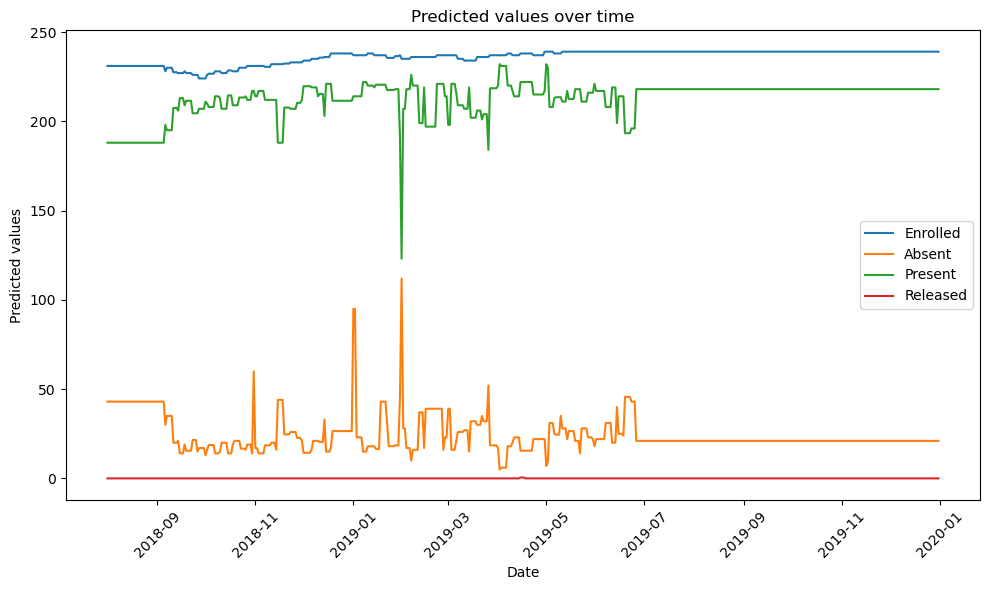

In [186]:
#plotting the predicted results verses dates defined in above mentioned array 'X_pred'

import matplotlib.pyplot as plt

# Extract the dates from X_pred
dates = X_pred[:, 1]  # Assuming the date is in the second column of X_pred

# Convert the date strings to datetime objects
dates = [datetime.strptime(date, "%Y%m%d") for date in dates]

# Plot the predicted values
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for i in range(prediction2.shape[1]):  # Iterate over columns
    if i==0:
        labels='Enrolled'
    elif i==1:
        labels='Absent'
    elif i==2:
        labels='Present'
    else:
        labels='Released'
    
    plt.plot(dates, prediction2[:, i], label=labels)

# Labeling the plot
plt.title('Predicted values over time')
plt.xlabel('Date')
plt.ylabel('Predicted values')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()